## Machine Learning con Scikit Learn
### Taller # 4

In [ ]:
# Ocultar los Warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Importar librerías
import pandas as pd
from sklearn import datasets

Importe la función necesaria para partir datasets empleando validación cruzada

In [ ]:
import numpy as np
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

## Regresión

In [ ]:
# Descripción del Dataset
wine_container = datasets.load_wine(as_frame=True)
print(wine_container['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
# Organización de Datos del Problema de Regresión en Forma de DataFrame
wine_data = wine_container['data']
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
corrs = abs(wine_data.corr()['alcohol']).sort_values(ascending=False)
corrs.drop('alcohol', axis=0, inplace=True)
corrs[corrs > 0.3].index # Las de correlación mayor a 0.3
corrs.iloc[:4] # Las 4 con mayor correlación

proline              0.643720
color_intensity      0.546364
alcalinity_of_ash    0.310235
total_phenols        0.289101
Name: alcohol, dtype: float64

1. Declare las variables.
En este problema de regresión la variable objetivo será **alcohol**, mientras que las variables explicativas serán todas las demás.


In [ ]:
# Se define alcohol como la variable target.
target = 'alcohol'

# Se definen malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids,
# nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines
# y proline como las features según lo mencionado en el enunciado.
features = [
    'malic_acid',
    'ash',
    'alcalinity_of_ash',
    'magnesium',
    'total_phenols',
    'flavanoids',
    'nonflavanoid_phenols',
    'proanthocyanins',
    'color_intensity',
    'hue',
    'od280/od315_of_diluted_wines',
    'proline'
]

2. Organice las variables en matrices

In [ ]:
# Se organizan las variables en matrices, definiendo las features en el
# eje X y el target como el eje Y.

y = wine_data[target]
X = wine_data[features]

3. Particione los datos empleando validación cruzada

Tip: emplee una partición 70/30

In [ ]:
# Se realiza la partición de los datos, 70% para training y 30% para testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

### Regresión Lineal

Importe la función para entrenar una regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

4. Configure el Modelo: Regresión Lineal
5. Entrene el Modelo
6. Compare los Resultados entre los Scores de Entrenamiento (*Train*) y Prueba (*Test*)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Training Score: {0: .2f}'.format(model.score(X_train, y_train)))
print('Testing Score: {0: .2f}'.format(model.score(X_test, y_test)))

Training Score:  0.57
Testing Score:  0.62


Extraiga los coeficientes de cada *feature*

In [ ]:
pd.Series(model.coef_, index=features, name='coefs')

malic_acid                      0.138852
ash                             0.196826
alcalinity_of_ash              -0.040779
magnesium                      -0.002625
total_phenols                  -0.008454
flavanoids                      0.077431
nonflavanoid_phenols           -0.207650
proanthocyanins                -0.153926
color_intensity                 0.159712
hue                             0.419427
od280/od315_of_diluted_wines    0.077023
proline                         0.001156
Name: coefs, dtype: float64

Interprete los resultados

In [ ]:
Un aumento en los features con coeficiente negativo podria hacer que el vino no pertenezca a la clase objetivo. Aquel con mayor influencia es el Hue

### Regularización

Importe la función para entrenar una regresión lineal regularizada empleando Elastic Net con Validación Cruzada con Kfolds (CV)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import ElasticNetCV

4. Configure el Modelo: **ElasticNetCV**


> Tips: Recuerde que ElasticNet es un método de regularización con varios paramétros a confifurar. Entre ellos:
- **l1_ratio**: que tanto emplear penalización l2 (valores cercanos a 0), o penalización l1 (valores cercacos a 1). En la práctica esto se hace de forma iterativa pasando varios valores (l1_ratio=[.1, .5, .7, .9, .95, .99, 1]) para que el escoja el valor que mejor extrapola resultados empleando validación cruzada.
- **cv**: este método emplea set de validación usando validación cruzada por KFolds. En las diapositivas del curso se encuentra este concepto. Esto le permite escojer no solo el mejor **l1_ratio** dentro del set de entrenamiento, sino también otros parametros, como el factor de penalización **alpha**. Sugiero que para este problema se usen 3 núcleos de de validación. (cv=3).
- **random_state**: debido a que emplea validación cruzada, este es un método aleatorio, por tanto la inclusión de una semilla permite la reproducibilidad de los resultados. Sugiero empleaar (random_state=1234)


5. Entrene el Modelo
6. Compare los Resultados entre los Scores de Entrenamiento (*Train*) y Prueba (*Test*)

In [ ]:
# Configuramos el StandardScaler como escalador seleccionado.
scaler = StandardScaler()

# Configuramos el l1_Ratio del modelo, con valores ascendentes hacia 1. Definimos el
# número de núcleos de validación en 3. Y tomamos como semilla 1234.
model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=3, random_state=1234)

# Configuramos el pipeline que importamos más arriba, con los valores que dimos posteriormente
# al scaler y al model
pipe = Pipeline([
    ('scaler', scaler),
    ('model', model)
])

# Entrenamos el pipeline con el 70% de los datos
pipe.fit(X_train, y_train)

# Estimamos la precisión del pipeline.
print('Training Score: {0: .2f}'.format(pipe.score(X_train, y_train)))
print('Testing Score: {0: .2f}'.format(pipe.score(X_test, y_test)))
print(' ')

Training Score:  0.53
Testing Score:  0.63
 


¿Que diferencias nota con los resultados de la regresión lineal?

In [ ]:
#no existen diferencias significativas, el modelo esta bien balanceado en terminos de capacidad de ajuste y de generalizacion

¿Por qué puede ser?

In [ ]:
.

Extraiga los coeficientes del modelo

In [ ]:
pd.Series(pipe['model'].coef_, index=features, name='coefs')

malic_acid                      0.028402
ash                             0.000000
alcalinity_of_ash              -0.058434
magnesium                      -0.000000
total_phenols                   0.000000
flavanoids                      0.012296
nonflavanoid_phenols           -0.000000
proanthocyanins                -0.000000
color_intensity                 0.252000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.368860
Name: coefs, dtype: float64

¿Por que hay algunos coeficientes iguales a cero?

In [ ]:
#puede ser por la cantidad de datos o el tipo de regularizacion

### Random Forest

Importe la función para entrenar Random Forest (Regresor)

In [ ]:
# Importar librerias necesarias para correr Random Forest
from sklearn.ensemble import RandomForestRegressor

4. Configure el Modelo: **RandomForestRegressor**


> Tips: Random Forest tiene varios parametros configurables. A continuación la configuración recomendada para este problema de regresión.
- **bootstrap**: False
- **max_depth**: 6
- **max_features**: 'sqrt'
- **min_samples_leaf**: 1
- **min_samples_split**: 9
- **n_estimators**: 50
- **random_state**:este es un método aleatorio, por tanto la inclusión de una semilla permite la reproducibilidad de los resultados. Sugiero empleaar (random_state=1234)

> A estos parametros configurables de un modelo de machine learning se les conoce en la literatura como **hiperparametros**. Esto debido a que usualmente se les designa parametros a los coeficientes, los cuales no son directamente configurables. Mas sobre los hiperparametros del Random Forest en este enlace: https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d



5. Entrene el Modelo
6. Compare los Resultados entre los Scores de Entrenamiento (*Train*) y Prueba (*Test*)

In [ ]:
model = RandomForestRegressor(
    bootstrap=False,
    max_depth=6,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=9,
    n_estimators=50,
    random_state=1234
)

model.fit(X_train, y_train)

print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))

Training Score:  0.9091056693204554
Testing Score:  0.6347237705092796


# Extraiga el listado de features más importantes para el modelo

In [ ]:
print('Top Features:')
feature_importances = model.feature_importances_
for feature, importance in sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True):
    print(f'{feature:<30}: {importance:.2f}')

Top Features:
color_intensity               : 0.27
proline                       : 0.18
flavanoids                    : 0.11
alcalinity_of_ash             : 0.10
od280/od315_of_diluted_wines  : 0.06
ash                           : 0.05
hue                           : 0.05
proanthocyanins               : 0.04
total_phenols                 : 0.04
magnesium                     : 0.04
malic_acid                    : 0.03
nonflavanoid_phenols          : 0.03


Compare estos resultados con los obtenidos por ElasticNet

¿Que diferencias observa?

Concluya

In [ ]:
#en esta lista la mayoria de valores son relativos al 0, el valor con mayor impacto ahora es la intensidad del color

## Clasificación

Importe las funciones necesarias para proyectar la matriz de confusión y el reporte de clasificación

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Descripción del Dataset
iris_container = datasets.load_iris(as_frame=True)
print(iris_container['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# Organización de Datos del Problema de Clasificación en Forma de DataFrame
iris_data = iris_container['data']
iris_data['class'] = iris_container['target']
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Regresión Logística

Importe la función para entrenar una regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

Entrene una regresión logística que permita predecir la clase **class** en función de los atributos en el dataset. No olvide imprimir el reporte de clasificación y la matriz de confusión.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



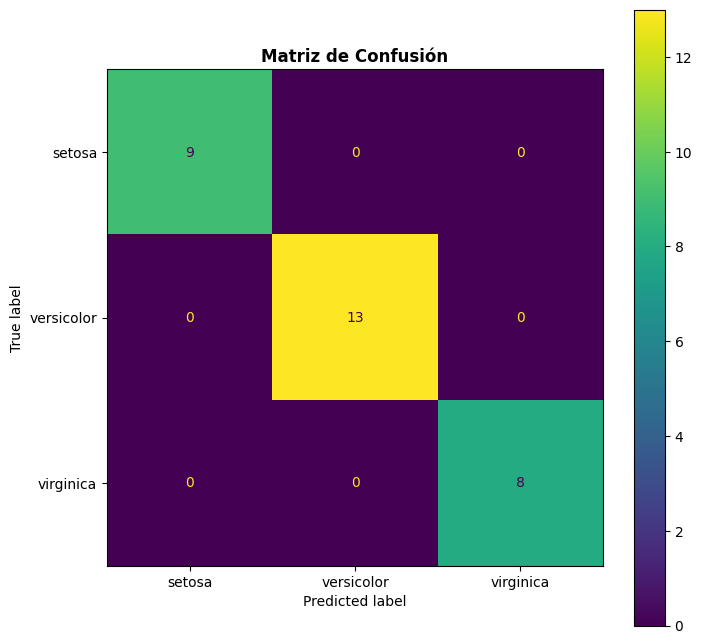

In [ ]:
# Definir un mapeo de diccionario para convertir valores numéricos a etiquetas de clase
class_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Aplicar el mapeo al conjunto de datos para reemplazar los valores numéricos con etiquetas de clase
iris_data['class'] = iris_data['class'].map(class_mapping)

# Definir las variables objetivo y características
target = 'class'
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Dividir el conjunto de datos en entrenamiento y prueba
y = iris_data[target]
X = iris_data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Matriz de Confusión', fontweight='bold')
conf_mat = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=y.unique(),
    ax=ax
)
plt.show()


¿Que le permiten concluir estos resultados?

In [ ]:
#el modelo es capaz de predecir con precision las clases del vino